In [ ]:
!pip install tensorflow

In [ ]:
!pip install scikit-image

In [1]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob


In [22]:
#class_names = ['Apple','avocado','Banana','cherry','kiwi','mango','orange','pinenapple','strawberries','watermelon']
#class_names = ['apple','banana','beetroot','bell pepper','cabbage','capsicum','carrot','cauliflower','chilli pepper','corn','cucumber','eggplant','garlic','ginger','grapes','jalepeno','kiwi','lemon','lettuce','mango','onion','orange','paprika','pear','peas','pineapple','pomegranate','potato','raddish','soy beans','spinach','sweetcorn','sweetpotato','tomato','turnip','watermelon']
class_names = ['apple','banana','carrot','corn','grapes','kiwi','mango','orange','pineapple','potato']
IMG_SIZE = 128

In [23]:
#read the data from a directory
#def get_data_from_folder(path):
#  data = []
#  for class_name in class_names: # iterate through classes
#    try:
#      files = glob.glob(path+"/"+class_name+"/*") # get files in each folder(class)
#      for f in files:
 #       img = cv2.imread(f) #read the image
 #       img = cv2.resize(img,(IMG_SIZE,IMG_SIZE)) #resize the image
#        data.append([np.array(img),class_names.index(class_name)]) #Append images and corresponding labels to data
#    except:
#      pass
 # np.random.shuffle(data)
#  return data

In [24]:
from skimage import exposure
batch_size = 32 
def get_data_from_folder(path, IMG_SIZE):
    data = []
    for class_name in class_names:
        try:
            files = glob.glob(path + "/" + class_name + "/*")
            for f in files:
                img = cv2.imread(f)
                
                if img is None:
                    print(f"Error: Unable to read image '{f}' for class {class_name}")
                    continue

                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                
                # Add normalization (scaling pixel values to 0-1)
                img = img.astype('float32') / 255.0
                img = exposure.rescale_intensity(img, in_range=(0, 1))

                # Data augmentation using ImageDataGenerator
                datagen = ImageDataGenerator(
                    #rescale=1./255,
                    rotation_range=20,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest'
                )
                #datagen = ImageDataGenerator(
                #    rotation_range=20,
                #    width_shift_range=0.2,
                #    height_shift_range=0.2,
                #    shear_range=0.2,
                #    zoom_range=0.2,
                #    horizontal_flip=True,
                #    fill_mode='nearest'
                #)
              

                # Reshape the image to (1, IMG_SIZE, IMG_SIZE, 3) as datagen.flow expects 4D input
                img = img.reshape((1,) + img.shape)

                # Generate augmented images and labels
                aug_iter = datagen.flow(img)

                for _ in range(5):  # You can adjust the number of augmented images per original image
                    augmented_images = aug_iter.next()
                    data.append([np.array(augmented_images[0]), class_names.index(class_name)])

        except Exception as e:
            print(f"Error processing class {class_name}: {str(e)}")

    np.random.shuffle(data)
    return data


In [25]:
# Path to the train, test, and predict folders
training_data = get_data_from_folder('data/train',IMG_SIZE)
path_to_test = 'data/test'
path_to_predict = 'data/predict'


# Process test data
test_data = get_data_from_folder(path_to_test, IMG_SIZE)

# Process predict data
predict_data = get_data_from_folder(path_to_predict, IMG_SIZE)


In [26]:
training_data

[[array([[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
  
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
  
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
  
         ...,
  
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
  
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
  
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]], dtype=f

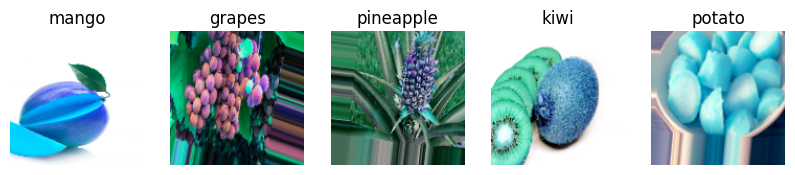

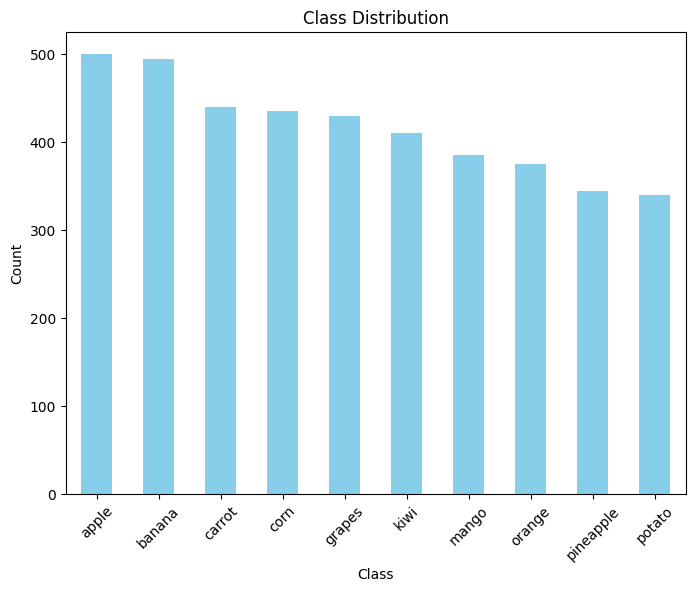

The dataset is well-balanced.


In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you already have 'train_data' as a list of [image, label] pairs

# Visualize a few samples from the dataset
def visualize_samples(data, class_names, num_samples=5):
    plt.figure(figsize=(10, 6))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        img, label = data[i]
        plt.imshow(img)
        plt.title(class_names[label])
        plt.axis('off')
    plt.show()

# Understand the distribution of classes
def plot_class_distribution(data, class_names):
    labels = [label for _, label in data]
    class_counts = pd.Series(labels).value_counts()

    plt.figure(figsize=(8, 6))
    class_counts.plot(kind='bar', color='skyblue')
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(range(len(class_names)), class_names, rotation=45)
    plt.show()

# Check for imbalances in the dataset
def check_imbalances(data, class_names):
    labels = [label for _, label in data]
    class_counts = pd.Series(labels).value_counts()

    imbalance_threshold = 0.2  # Adjust this threshold based on your preferences

    imbalanced_classes = class_counts[class_counts / len(labels) > imbalance_threshold].index.tolist()

    if imbalanced_classes:
        print(f"Imbalanced classes: {', '.join([class_names[c] for c in imbalanced_classes])}")
    else:
        print("The dataset is well-balanced.")

# Example usage
visualize_samples(training_data, class_names)
plot_class_distribution(training_data, class_names)
check_imbalances(training_data, class_names)


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler
# Assuming you have 'IMG_SIZE', 'num_classes', 'class_names', and 'train_data' defined

# Convert class labels in the data to integers
train_data_int_labels = [(img, label) for img, label in training_data]

# Build the model
#def build_dense_model(input_shape, num_classes):
#    model = Sequential([
#    Flatten(input_shape=(IMG_SIZE, IMG_SIZE, 3)),
#    BatchNormalization(),  # Add Batch Normalization
#    Dense(512, activation='relu'),
#    Dropout(0.5),  # Add dropout
#    Dense(256, activation='relu'),
#    BatchNormalization(),  # Add Batch Normalization
#    Dropout(0.5),  # Add dropout
#    Dense(len(class_names), activation='softmax')
#    ])





#    return model
def build_deep_wide_model(input_shape, num_classes):
    
    # Example of adding more layers and units
    model = Sequential([
    Flatten(input_shape=input_shape),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(128, activation='relu'),  # Additional layer
    BatchNormalization(),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')
     ])

#    model = Sequential([
#        Flatten(input_shape=input_shape),
        
#        Dense(512, activation='relu'),
#        BatchNormalization(),
#        Dropout(0.5),
        
#        Dense(512, activation='relu'),
#        BatchNormalization(),
#        Dropout(0.5),
        
#        Dense(256, activation='relu'),
#        BatchNormalization(),
#        Dropout(0.5),

#        Dense(256, activation='relu'),
#        BatchNormalization(),
#        Dropout(0.5),

#        Dense(num_classes, activation='softmax')
#    ])
    
    return model

# Define the model
model = build_deep_wide_model(input_shape=(IMG_SIZE, IMG_SIZE, 3), num_classes=len(class_names))

# Compile the model with SGD optimizer
model.compile(optimizer=Adam(learning_rate=0.01), 
              loss=SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Print the model summary
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 49152)             0         
                                                                 
 dense_10 (Dense)            (None, 512)               25166336  
                                                                 
 batch_normalization_8 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 512)               262656    
                                                                 
 batch_normalization_9 (Bat  (None, 512)               2048      
 chNormalization)                                     

Epoch 1/30
104/104 [==============================] - 29s 216ms/step - loss: 2.6435 - accuracy: 0.1593 - val_loss: 10.6602 - val_accuracy: 0.0990
Epoch 2/30
104/104 [==============================] - 22s 208ms/step - loss: 2.2019 - accuracy: 0.2031 - val_loss: 2.6470 - val_accuracy: 0.2424
Epoch 3/30
104/104 [==============================] - 22s 208ms/step - loss: 2.0726 - accuracy: 0.2556 - val_loss: 1.7863 - val_accuracy: 0.3394
Epoch 4/30
104/104 [==============================] - 21s 202ms/step - loss: 2.0067 - accuracy: 0.2698 - val_loss: 1.6265 - val_accuracy: 0.3778
Epoch 5/30
104/104 [==============================] - 21s 206ms/step - loss: 1.8863 - accuracy: 0.3211 - val_loss: 1.7403 - val_accuracy: 0.3273
Epoch 6/30
104/104 [==============================] - 22s 208ms/step - loss: 1.8764 - accuracy: 0.3314 - val_loss: 1.5325 - val_accuracy: 0.4424
Epoch 7/30
104/104 [==============================] - 22s 208ms/step - loss: 1.8356 - accuracy: 0.3461 - val_loss: 1.4548 - val_a

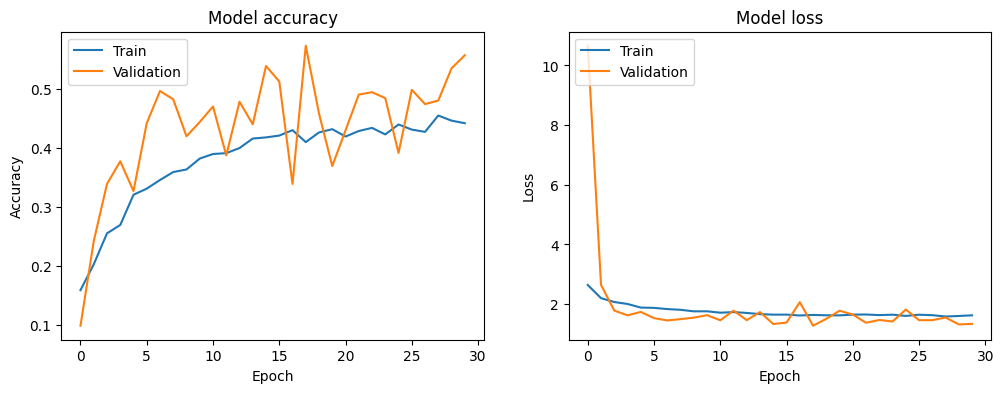

In [32]:
# Extract features and labels from the preprocessed training data
X_train = np.array([data[0] for data in train_data_int_labels])
y_train = np.array([data[1] for data in train_data_int_labels])

# Assuming you have 'test_data' for validation
X_val = np.array([data[0] for data in test_data])
y_val = np.array([data[1] for data in test_data])

# Train the model and monitor metrics
history = model.fit(X_train, y_train, epochs=30, batch_size=40, validation_data=(X_val, y_val))


# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [33]:
# Assuming 'test_data' contains the images you want to test
X_test = np.array([data[0] for data in test_data])
y_true = np.array([data[1] for data in test_data])

# Make predictions using the trained model
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Print true labels and predicted labels
for true_label, pred_label in zip(y_true, y_pred_classes):
    print(f"True Label: {class_names[true_label]}, Predicted Label: {class_names[pred_label]}")

# Evaluate accuracy on the test set
test_accuracy = np.sum(y_pred_classes == y_true) / len(y_true)
print(f"\nTest Accuracy: {test_accuracy:.4f}")


16/16 [==============================] - 1s 21ms/step
True Label: banana, Predicted Label: banana
True Label: orange, Predicted Label: orange
True Label: orange, Predicted Label: orange
True Label: grapes, Predicted Label: apple
True Label: grapes, Predicted Label: potato
True Label: apple, Predicted Label: apple
True Label: grapes, Predicted Label: grapes
True Label: orange, Predicted Label: orange
True Label: kiwi, Predicted Label: kiwi
True Label: banana, Predicted Label: banana
True Label: grapes, Predicted Label: grapes
True Label: grapes, Predicted Label: grapes
True Label: potato, Predicted Label: potato
True Label: pineapple, Predicted Label: grapes
True Label: orange, Predicted Label: orange
True Label: apple, Predicted Label: pineapple
True Label: orange, Predicted Label: orange
True Label: orange, Predicted Label: orange
True Label: pineapple, Predicted Label: grapes
True Label: pineapple, Predicted Label: grapes
True Label: apple, Predicted Label: apple
True Label: banana, 